# Scypi

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, interpolate, linalg, stats, signal, ndimage, spatial

### --- 1. Optimization (scipy.optimize) ---


1. Optimization (scipy.optimize)
--------------------------------
Minimizing a simple 1D function:
Function f(x) = x^2 + 5*sin(x)
Minimum found at x: -1.1105
Minimum function value: -3.2464

Curve Fitting (least_squares):
True parameters (approx): [2.5, 1.5, 0.5, 3.0]
Fitted parameters: [2.53897306 1.50388753 0.49590352 3.00811289]


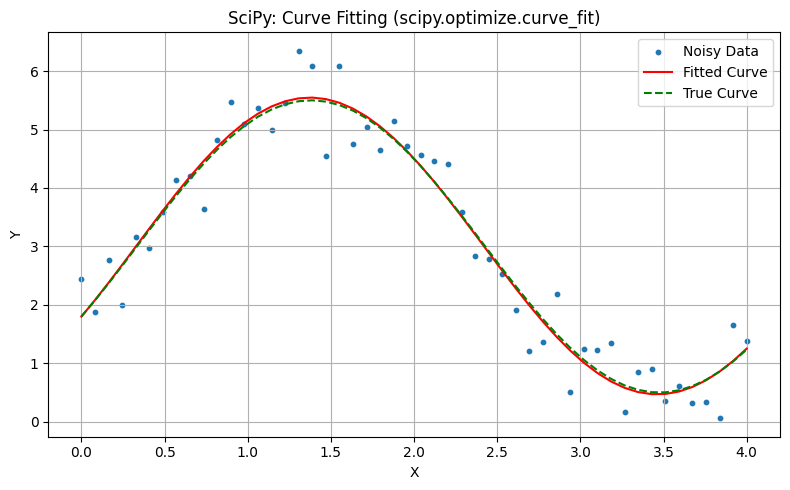

In [2]:

print("\n1. Optimization (scipy.optimize)")
print("--------------------------------")

# Example 1: Minimizing a function
print("Minimizing a simple 1D function:")
def f(x):
    return x**2 + 5*np.sin(x)

# Use minimize to find the local minimum
result_minimize = optimize.minimize(f, x0=0) # x0 is initial guess
print(f"Function f(x) = x^2 + 5*sin(x)")
print(f"Minimum found at x: {result_minimize.x[0]:.4f}")
print(f"Minimum function value: {result_minimize.fun:.4f}")

# Example 2: Curve fitting (least squares)
print("\nCurve Fitting (least_squares):")
# Generate some noisy data that approximately follows a sine wave
x_data = np.linspace(0, 4, 50)
y_true = 2.5 * np.sin(1.5 * x_data - 0.5) + 3.0
y_data = y_true + 0.5 * np.random.normal(size=len(x_data))

# Define the model function to fit
def sine_model(x, a, b, c, d):
    return a * np.sin(b * x - c) + d

# Define the residual function (difference between model and data)
def residuals(params, x, y):
    return sine_model(x, *params) - y

# Initial guess for the parameters (a, b, c, d)
initial_guess = [1, 1, 0, 1]

# Perform least squares fitting
params_fit, covariance = optimize.curve_fit(sine_model, x_data, y_data, p0=initial_guess)

print(f"True parameters (approx): [2.5, 1.5, 0.5, 3.0]")
print(f"Fitted parameters: {params_fit}")

# Plotting the curve fit (optional, requires matplotlib)
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label='Noisy Data', s=10)
plt.plot(x_data, sine_model(x_data, *params_fit), color='red', label='Fitted Curve')
plt.plot(x_data, y_true, color='green', linestyle='--', label='True Curve')
plt.title('SciPy: Curve Fitting (scipy.optimize.curve_fit)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### --- 2. Interpolation (scipy.interpolate) ---


2. Interpolation (scipy.interpolate)
-----------------------------------
Original points (x): [0 1 2 3 4 5]
Original points (y): [ 0.   0.8  0.9  0.1 -0.8 -1. ]
Interpolated y at x=2.5: 0.5750


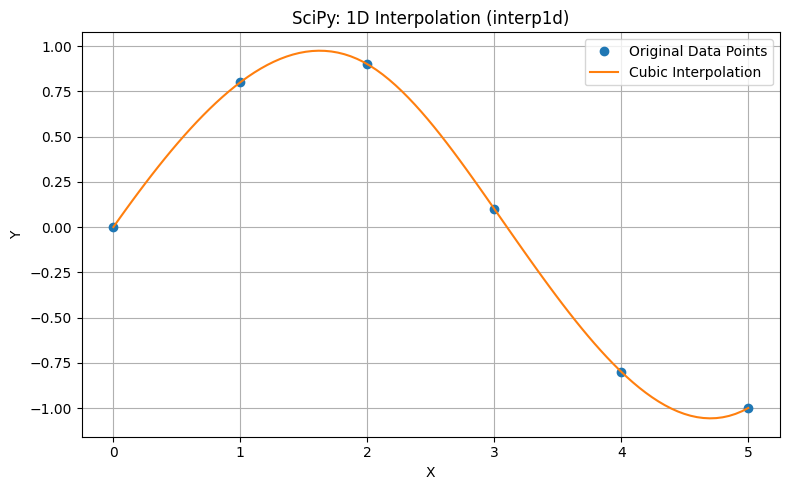

In [3]:

print("\n2. Interpolation (scipy.interpolate)")
print("-----------------------------------")
# Generate some sample data points
x_points = np.array([0, 1, 2, 3, 4, 5])
y_points = np.array([0, 0.8, 0.9, 0.1, -0.8, -1.0])

# Create an interpolation function (cubic spline is common)
f_interp = interpolate.interp1d(x_points, y_points, kind='cubic')

# Define new points where we want to interpolate
x_new = np.linspace(0, 5, 100)
y_interp = f_interp(x_new)

print(f"Original points (x): {x_points}")
print(f"Original points (y): {y_points}")
print(f"Interpolated y at x=2.5: {f_interp(2.5):.4f}")

# Plotting interpolation (optional)
plt.figure(figsize=(8, 5))
plt.plot(x_points, y_points, 'o', label='Original Data Points')
plt.plot(x_new, y_interp, '-', label='Cubic Interpolation')
plt.title('SciPy: 1D Interpolation (interp1d)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### --- 3. Linear Algebra (scipy.linalg) ---

In [4]:

print("\n3. Linear Algebra (scipy.linalg)")
print("--------------------------------")

# Example 1: Solving a system of linear equations Ax = b
A = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])
x_solution = linalg.solve(A, b)
print(f"Solving Ax = b where A=\n{A}\nand b={b}")
print(f"Solution x: {x_solution}")
print(f"Check A @ x: {A @ x_solution} (should be close to b)")

# Example 2: Determinant of a matrix
matrix_det = np.array([[1, 2], [3, 4]])
det_val = linalg.det(matrix_det)
print(f"\nDeterminant of matrix {matrix_det}:\n {det_val}")

# Example 3: Eigenvalues and eigenvectors
eigen_matrix = np.array([[2, -1], [-1, 2]])
eigen_vals, eigen_vecs = linalg.eig(eigen_matrix)
print(f"\nEigenvalues of {eigen_matrix}:\n {eigen_vals}")
print(f"Eigenvectors:\n {eigen_vecs}") # Each column is an eigenvector


3. Linear Algebra (scipy.linalg)
--------------------------------
Solving Ax = b where A=
[[3 1]
 [1 2]]
and b=[9 8]
Solution x: [2. 3.]
Check A @ x: [9. 8.] (should be close to b)

Determinant of matrix [[1 2]
 [3 4]]:
 -2.0

Eigenvalues of [[ 2 -1]
 [-1  2]]:
 [3.+0.j 1.+0.j]
Eigenvectors:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


### --- 4. Statistics (scipy.stats) ---

In [5]:

print("\n4. Statistics (scipy.stats)")
print("--------------------------")

# Example 1: Normal Distribution (PDF, CDF, sampling)
mean, std_dev = 0, 1 # Standard normal distribution
# Probability Density Function (PDF)
pdf_val = stats.norm.pdf(0, loc=mean, scale=std_dev)
print(f"PDF of normal distribution at x=0: {pdf_val:.4f}")
# Cumulative Distribution Function (CDF)
cdf_val = stats.norm.cdf(1.96, loc=mean, scale=std_dev)
print(f"CDF of normal distribution at x=1.96: {cdf_val:.4f} (approx 97.5%)")
# Generate random samples
random_samples = stats.norm.rvs(loc=mean, scale=std_dev, size=5)
print(f"5 random samples from normal distribution: {random_samples}")

# Example 2: T-test (independent samples)
data1 = np.array([10, 12, 11, 15, 13])
data2 = np.array([18, 16, 20, 19, 17])
ttest_result = stats.ttest_ind(data1, data2)
print(f"\nT-test between data1 {data1} and data2 {data2}:")
print(f"Statistic: {ttest_result.statistic:.4f}, P-value: {ttest_result.pvalue:.4f}")
if ttest_result.pvalue < 0.05:
    print(" (P-value < 0.05, suggesting a significant difference between means)")
else:
    print(" (P-value >= 0.05, no significant difference detected)")

# Example 3: Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_points, y_points)
print(f"\nLinear regression for x_points and y_points:")
print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}, R-value: {r_value:.4f}, P-value: {p_value:.4f}")


4. Statistics (scipy.stats)
--------------------------
PDF of normal distribution at x=0: 0.3989
CDF of normal distribution at x=1.96: 0.9750 (approx 97.5%)
5 random samples from normal distribution: [-0.36446265 -0.19691191  0.66316711  1.60376626 -0.13525716]

T-test between data1 [10 12 11 15 13] and data2 [18 16 20 19 17]:
Statistic: -5.2086, P-value: 0.0008
 (P-value < 0.05, suggesting a significant difference between means)

Linear regression for x_points and y_points:
Slope: -0.3029, Intercept: 0.7571, R-value: -0.7196, P-value: 0.1069


### --- 5. Signal Processing (scipy.signal) ---


5. Signal Processing (scipy.signal)
---------------------------------
Original signal: [0 0 1 1 1 0 0]
Filter: [0.5 0.5]
Convolved signal (mode='valid'): [0.  0.5 1.  1.  0.5 0. ]

Applied a 2nd order Butterworth low-pass filter to y_data (first 5 values):
[2.44478504 1.87981539 2.76795934 1.99631632 3.16131039] -> [0.04909951 0.21259727 0.48057362 0.80286017 1.1443278 ]


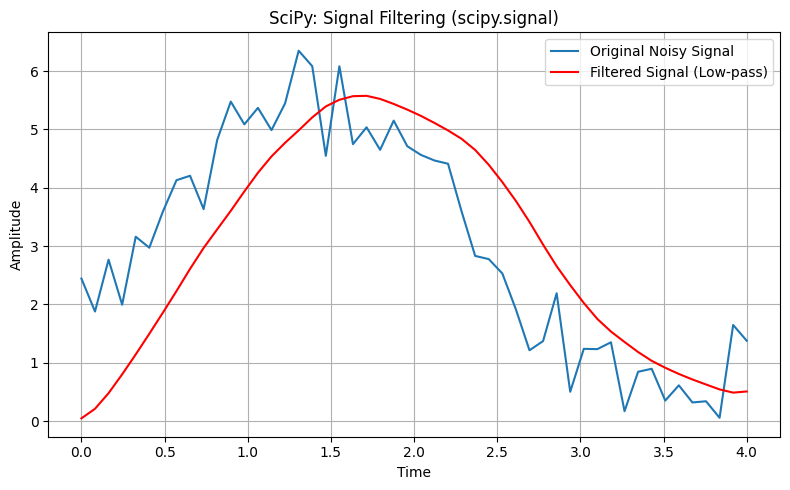

In [6]:

print("\n5. Signal Processing (scipy.signal)")
print("---------------------------------")
# Example 1: Convolution
sig = np.array([0, 0, 1, 1, 1, 0, 0]) # A simple square pulse signal
filt = np.array([0.5, 0.5])          # A simple averaging filter
convolved_sig = signal.convolve(sig, filt, mode='valid') # 'valid' returns only full overlaps
print(f"Original signal: {sig}")
print(f"Filter: {filt}")
print(f"Convolved signal (mode='valid'): {convolved_sig}")

# Example 2: Filtering (Butterworth filter)
fs = 100 # Sampling frequency
nyq = 0.5 * fs # Nyquist frequency
cutoff = 5 / nyq # Normalized cutoff frequency
b, a = signal.butter(N=2, Wn=cutoff, btype='low', analog=False) # 2nd order low-pass
filtered_signal = signal.lfilter(b, a, y_data) # Apply the filter to y_data
print(f"\nApplied a 2nd order Butterworth low-pass filter to y_data (first 5 values):\n{y_data[:5]} -> {filtered_signal[:5]}")

# Plotting filtered signal (optional)
plt.figure(figsize=(8, 5))
plt.plot(x_data, y_data, label='Original Noisy Signal')
plt.plot(x_data, filtered_signal, label='Filtered Signal (Low-pass)', color='red')
plt.title('SciPy: Signal Filtering (scipy.signal)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### --- 6. Image Processing (scipy.ndimage) ---


6. Image Processing (scipy.ndimage)
----------------------------------
Original dummy image (top-left 5x5):
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1.]]

Blurred image (sigma=1, top-left 5x5):
[[0.   0.02 0.04 0.06 0.06]
 [0.02 0.09 0.21 0.28 0.3 ]
 [0.04 0.21 0.49 0.66 0.7 ]
 [0.06 0.28 0.66 0.89 0.94]
 [0.06 0.3  0.7  0.94 0.99]]

Rotated image (45 deg, top-left 5x5, values rounded):
[[ 0.    0.    0.   -0.03 -0.01]
 [ 0.    0.   -0.03 -0.02  0.77]
 [ 0.   -0.03 -0.02  0.68  1.1 ]
 [-0.03 -0.02  0.68  1.13  0.97]
 [-0.01  0.77  1.1   0.97  1.  ]]


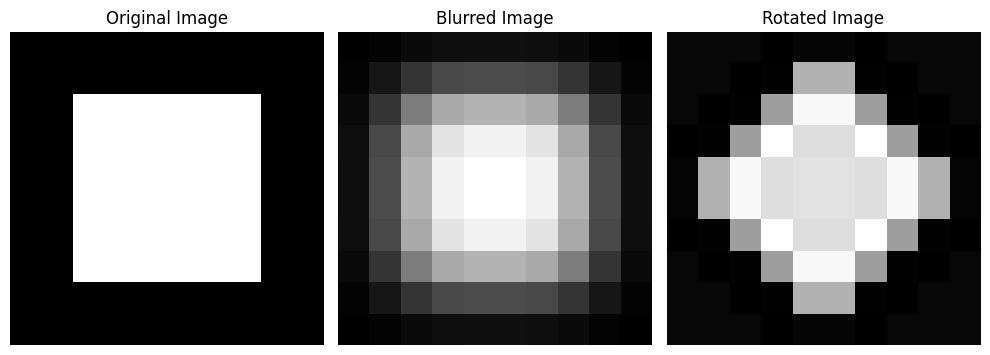

In [7]:

print("\n6. Image Processing (scipy.ndimage)")
print("----------------------------------")
# Create a dummy 2D image (e.g., a square)
image = np.zeros((10, 10))
image[2:8, 2:8] = 1 # A white square on a black background
print("Original dummy image (top-left 5x5):\n", image[:5, :5])

# Example 1: Gaussian blurring
blurred_image = ndimage.gaussian_filter(image, sigma=1) # Sigma controls blur strength
print(f"\nBlurred image (sigma=1, top-left 5x5):\n{blurred_image[:5, :5].round(2)}")

# Example 2: Rotation
rotated_image = ndimage.rotate(image, angle=45, reshape=False) # Rotate by 45 degrees
print(f"\nRotated image (45 deg, top-left 5x5, values rounded):\n{rotated_image[:5, :5].round(2)}")

# Plotting images (optional)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rotated_image, cmap='gray')
plt.title('Rotated Image')
plt.axis('off')
plt.tight_layout()
plt.show()

### --- 7. Spatial Data Structures (scipy.spatial) ---

In [8]:

print("\n7. Spatial Data Structures (scipy.spatial)")
print("-----------------------------------------")
# Example: Nearest neighbors using cKDTree (optimized for many queries)
points = np.array([[0, 0], [1, 1], [2, 0], [0.5, 0.5]])
tree = spatial.cKDTree(points)
print(f"Points for KDTree:\n{points}")

# Query for nearest neighbor to a new point
query_point = np.array([0.6, 0.4])
distance, index = tree.query(query_point)
print(f"\nQuery point: {query_point}")
print(f"Nearest neighbor distance: {distance:.4f}")
print(f"Nearest neighbor index: {index}")
print(f"Nearest neighbor point: {points[index]}")

# Query for k nearest neighbors
k_nearest_distances, k_nearest_indices = tree.query(query_point, k=2)
print(f"\n2 Nearest neighbors distances: {k_nearest_distances.round(4)}")
print(f"2 Nearest neighbors indices: {k_nearest_indices}")
print(f"2 Nearest neighbors points:\n{points[k_nearest_indices]}")

print("\n--- End of SciPy Script ---")


7. Spatial Data Structures (scipy.spatial)
-----------------------------------------
Points for KDTree:
[[0.  0. ]
 [1.  1. ]
 [2.  0. ]
 [0.5 0.5]]

Query point: [0.6 0.4]
Nearest neighbor distance: 0.1414
Nearest neighbor index: 3
Nearest neighbor point: [0.5 0.5]

2 Nearest neighbors distances: [0.1414 0.7211]
2 Nearest neighbors indices: [3 1]
2 Nearest neighbors points:
[[0.5 0.5]
 [1.  1. ]]

--- End of SciPy Script ---
